# Home work


## Data

Investigate the dataset (*house_data.csv* file). 

Split data by using scikit-learn method *train_test_split* (check the tips and additional links senction below) Train = 80%, test - 20% and random_state=49.

The following columns should be analysed:
    - date 
    - yr_renovated 
    - yr_built
    - lat
    - long
    - sqft_living
    - sqft_lot
    - sqft_above
    - sqft_basement
    

## Linear regression

Build the linear regression model that have the best score you can achieve. 
The model should predict the house price (price column in csv file).


## Logistic regression

Build the logistic regression model that have the best score you achieved. 
The model should predict the house grade (grade column in csv file).


## Evaluation

1. The code for data preprocessing of the specified columns above and your text explanation (comments or text cell in notebook) of your decision. For example, you represent the *date* column as integer (date in seconds format) and you should explain why you decided so.
2. Train linear regression model 
3. Visualize train and test mean squared error values
4. Train multiclass logistic regression model (one-vs-rest (OvR) scheme)
5. Visualize train and test accuracy values
6. Summary for both models.


## Submit
Two options for submition: via email or on [distedu.ukma.edu.ua](https://distedu.ukma.edu.ua/course/view.php?id=32)

You should submit jupyter notebook by Friday, October 19th till 6pm EEST timezone.



## Tips and additional links

Don't forget to split data. Train - 80% and test - 20%. You can use scikit-learn method [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

The links below are additional resources
More about [data exploration(investigation)](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true)

More about visualization [here](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true) and [here](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true)

[Sklearn OneVsOneClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html)

[LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression)

## Step#1 - Initialization, reading input

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

In [2]:
#dataset
temp_data= pd.read_csv("house_data.csv")

## Step#2 - Data Exploration

In [3]:
temp_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
#checking for null entries - everything seems fine
temp_data.isnull().any()

id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [5]:
#checking data types - everything except data(object type) seems legit aswell
temp_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Data is pretty clean, only object field will need some improvements. For now, let's move to pairplot part:

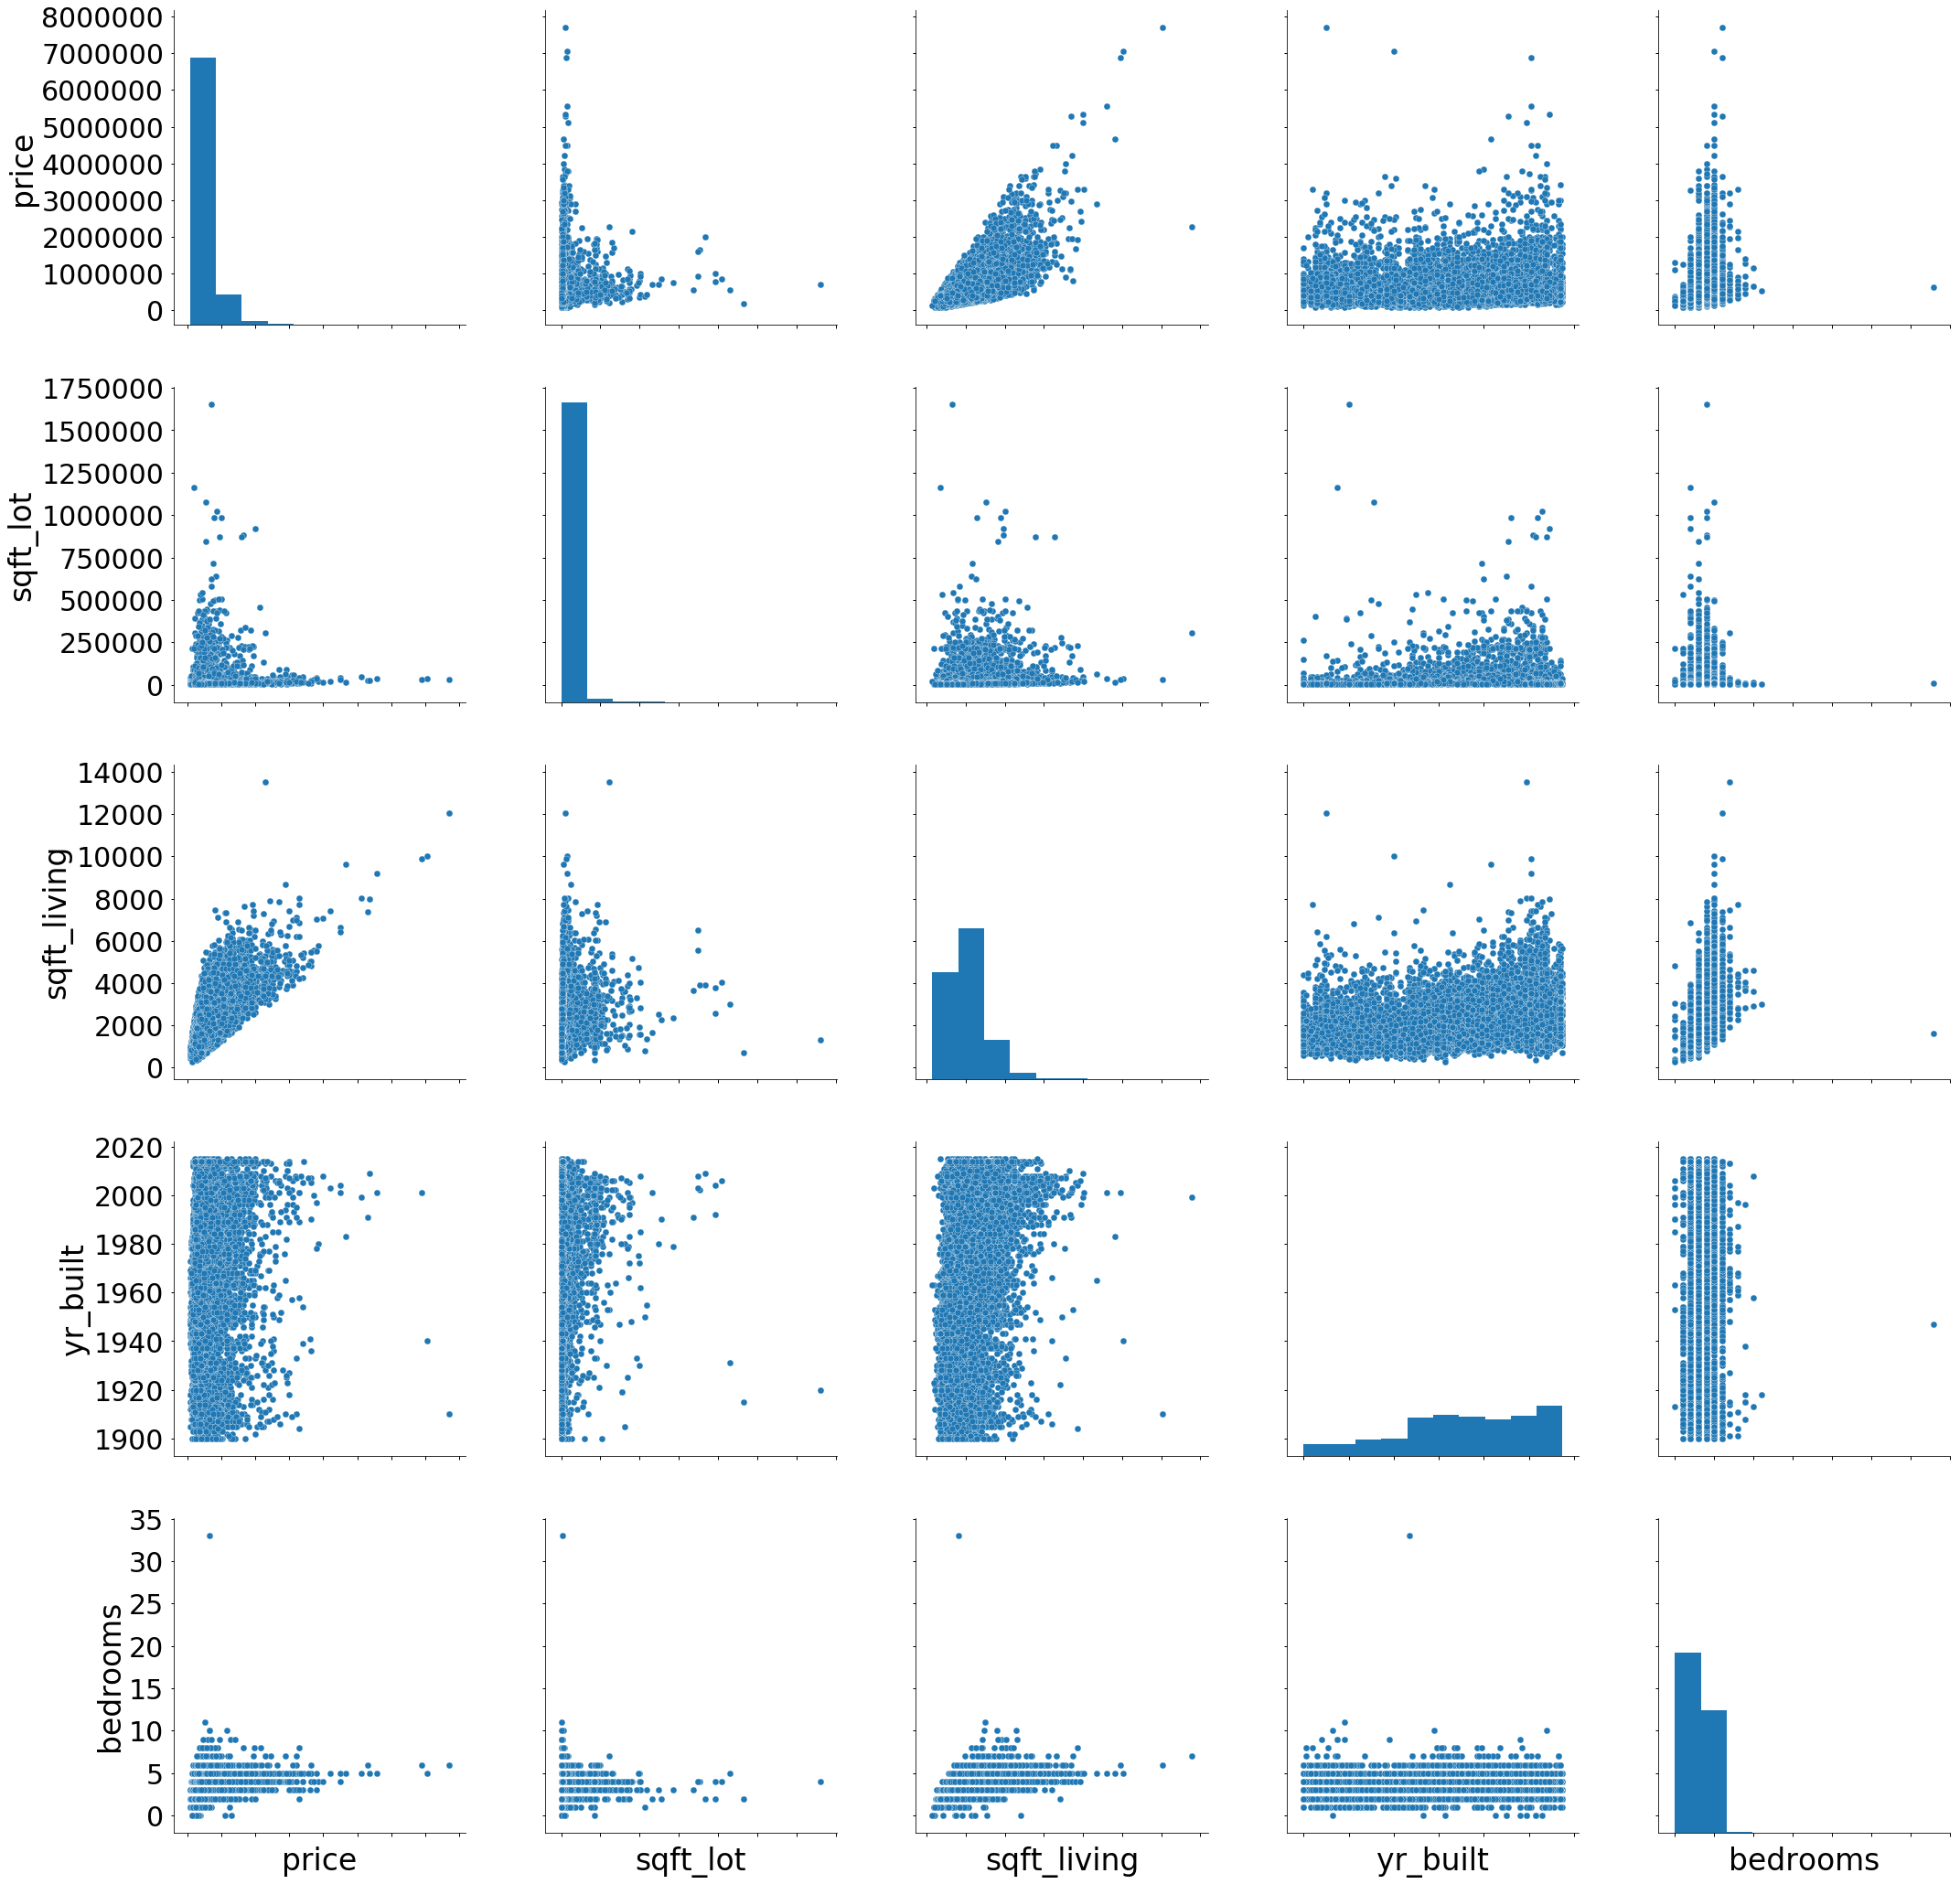

In [6]:
with sns.plotting_context("notebook",font_scale=3):
    graph = sns.pairplot(temp_data[['price','sqft_lot','sqft_living','yr_built','bedrooms']],palette='tab20',size=6)
graph.set(xticklabels=[])

Let's try correlation heatmap:

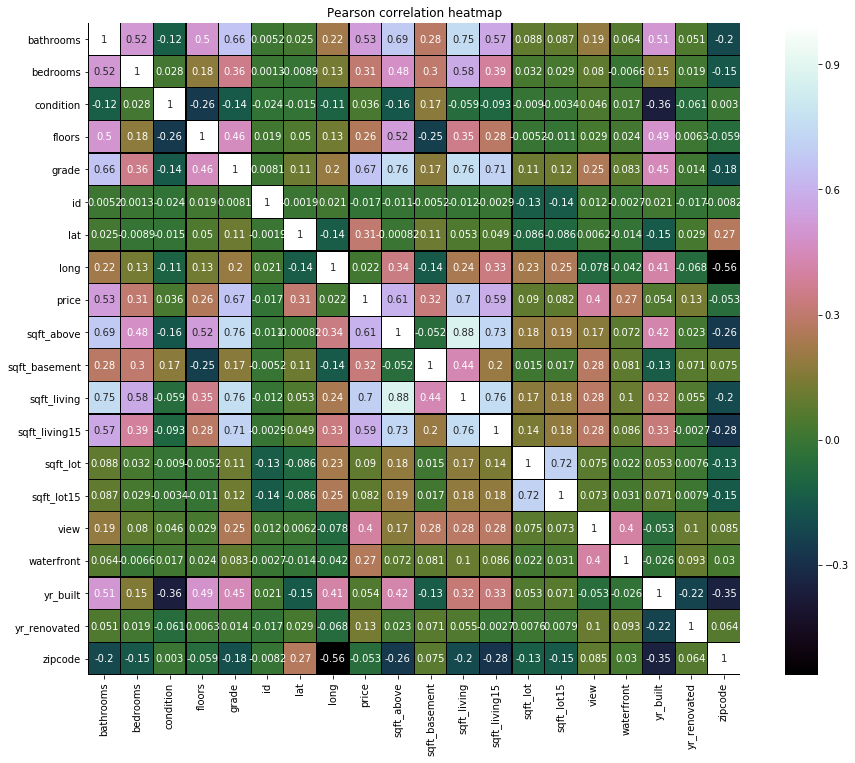

In [7]:
strings = []
for colname, colvalue in temp_data.iteritems():
    if type(colvalue[1])==str:
        strings.append(colname)

num = temp_data.columns.difference(strings)

house_num = temp_data[num]
f,ax = plt.subplots(figsize=(16,12))
plt.title("Pearson correlation heatmap")

sns.heatmap(house_num.astype(float).corr(),linewidth=0.25,vmax=1.0,square=True,cmap='cubehelix',linecolor='k',annot=True)

price mostly depends on: grade(0.67),sqft_above(0.61),sqft_living(0.7).<br> 
interestingly, sqft_lot and sqft_lot15 are dependent only by 0.76 

The following columns should be analysed:

- date 
- yr_renovated 
- yr_built
- lat
- long
- sqft_living
- sqft_lot
- sqft_above
- sqft_basement

### Feature engineering:
We are going to perform certain operations:
<p>1.converting date (Example: '20120410T000000'->'2012-04-10') - to get rid of an object column and be able to use it as a feature later</p> 
2.yr_built=abs(yr_built-2018) - sort of normalization<br>
3.yr_renovated=abs(yr_renovated-2018) - same as yr_built <br>
4.sqft_total = sqft_above + sqft_basement + sqft_living - first generated feature<br>

In [8]:
#converting date to datetime object
def changeDate(date):
    return pd.to_datetime(date.split('T')[0],format = '%Y%m%d').strftime(format='%Y-%m-%d')
#changing yr_renovated
def changeYrRenovated(yr):
    res = abs(yr-2018) if yr!=0 else -1 #-1 if a house haven't been renovated yet
    return res 
#generating total area as a feature
def totalArea(listOfAreas):
    return sum(listOfAreas)

In [9]:
#"standartizing" a dataset - function is created for reusability reasons
def generate_data(temp_data):
    res = temp_data.copy()
    res.date = res.date.apply(changeDate)
    res.yr_built = abs(res.yr_built-2018)
    res.yr_renovated = res.yr_renovated.apply(changeYrRenovated)
    return res

In [15]:
data = generate_data(temp_data)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,63,-1,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,67,27,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,85,-1,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,53,-1,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,31,-1,98074,47.6168,-122.045,1800,7503


### Conclusions:

## Model overview

### Splitting the data:

In [14]:
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["price"],test_size=0.2)


## Simple model:

In [15]:
def simple_linear_regression_model(train_X,test_X,train_Y,test_Y,feature):
    lr = linear_model.LinearRegression()

    X_train,Y_train = train_X[feature].values.reshape(-1,1), train_Y.values
    X_test,Y_test = test_X[feature].values.reshape(-1,1), np.array(test_Y,dtype=pd.Series)

    lr.fit(X_train,Y_train)
    
    pred = lr.predict(X_test)
    #mse and score will be stored locally
    mse,test_score,train_score = np.sqrt(metrics.mean_squared_error(Y_test,pred)),lr.score(X_test,Y_test),lr.score(X_train,Y_train)
    #mse and score will be added to the score table
    results.loc[feature] = (mse,test_score,train_score)

-for the sake of curiosity, we'll begin with a simple linear regression with every feature as a separate parameter<br>
-'date','id' and 'price' will be omitted<br>
-from the previously built correlation heatmap, we should expect 'grade','sqft_above','sqft_living' to perform better than the others

In [16]:
used_data = data.drop(['id','date','price'],axis = 1)

In [17]:
results = pd.DataFrame(columns = ['mse','test_score','train_score'])
features = used_data.columns.values
for feature in features:
    simple_linear_regression_model(train_X,test_X,train_Y,test_Y,feature)
results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0])

,mse,test_score,train_score
sqft_living,261826.711343,0.489535,0.493658
grade,270175.059461,0.456464,0.442710
sqft_living15,293400.389025,0.358998,0.338568
sqft_above,295861.785389,0.348198,0.371303
bathrooms,311445.171394,0.277728,0.275263
view,336831.334970,0.155183,0.158480
sqft_basement,344137.683755,0.118135,0.101487
bedrooms,348086.206801,0.097782,0.094373
lat,348159.436156,0.097402,0.093442
waterfront,354110.328638,0.066284,0.072088


our previous assumptions seem to be fair enough. However, we definitely have to build multiple LR, as our results are far from satisfying

## More complex model
Let's build a multiple linear regression with all the features (except 'date' and 'id) at once

In [18]:
def multiple_linear_regression(ind,train_X, test_X,train_Y,test_Y,features):
    lr = linear_model.LinearRegression()

    X_train,Y_train = train_X[features].values,train_Y.values
    X_test,Y_test = test_X[features].values,test_Y.values
    
    lr.fit(X_train,Y_train)
    pred = lr.predict(X_test)
    
    #mse,score will be stored locally
    mse,test_score,train_score = np.sqrt(metrics.mean_squared_error(Y_test,pred)),lr.score(X_test,Y_test),lr.score(X_train,Y_train)
    #mse and score will be added to the score table
    results.loc[ind] = (mse,test_score,train_score)

In [19]:
def run(ind,features):
    multiple_linear_regression(ind,train_X,test_X,train_Y,test_Y,features)
    print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

In [20]:
used_data = data.drop(['id','date','price'],axis = 1)
#results = pd.DataFrame(columns = ['mse','score'])
features = used_data.columns.values
multiple_linear_regression('all features',train_X,test_X,train_Y,test_Y,features)
results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0])

,mse,test_score,train_score
all features,200177.887745,0.701620,0.698619
sqft_living,261826.711343,0.489535,0.493658
grade,270175.059461,0.456464,0.442710
sqft_living15,293400.389025,0.358998,0.338568
sqft_above,295861.785389,0.348198,0.371303
bathrooms,311445.171394,0.277728,0.275263
view,336831.334970,0.155183,0.158480
sqft_basement,344137.683755,0.118135,0.101487
bedrooms,348086.206801,0.097782,0.094373
lat,348159.436156,0.097402,0.093442


We got 0.69.Seems to be an improvement. We may try to run multiple LR with all combinations (18! = 6.4 * 10^15), but this seems extremely unreasonable <br>
Let's perform some experiments:<br>
1.Run multiple LR with 5 most important features<br>
2.Run multiple LR with 10 most important features<br>
3.Run multiple LR with 12 most important features<br>
4.Drop 3 least significant columns: 'sqft_lot', 'sqft_lot15', 'condition' (using 15 features)<br>


In [21]:
#list, constisted of features for each experiment
features_list = [
    ['sqft_living','grade','sqft_living15','sqft_above','bathrooms'],
    ['sqft_living','grade','sqft_living15','sqft_above','bathrooms','view','sqft_basement','lat','bedrooms','floors'],
    ['sqft_living','grade','sqft_living15','sqft_above','bathrooms','view','sqft_basement','lat','bedrooms','floors','waterfront','sqft_lot'],
    data.drop(['id','date','price','sqft_lot','sqft_lot15','condition'],axis = 1).columns.values]
ids_list = [
    '5 most important',
    '10 most important',
    '12 most important',
    'without 3 least significant'
           ]

In [22]:
for i in range(len(features_list)):
    multiple_linear_regression(ids_list[i],train_X,test_X,train_Y,test_Y,features_list[i])
print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

                                       mse  test_score  train_score
all features                 200177.887745    0.701620     0.698619
without 3 least significant  200573.993935    0.700438     0.696628
12 most important            214061.013400    0.658797     0.657561
10 most important            219207.328364    0.642194     0.640499
5 most important             245933.395315    0.549627     0.542776
sqft_living                  261826.711343    0.489535     0.493658
grade                        270175.059461    0.456464     0.442710
sqft_living15                293400.389025    0.358998     0.338568
sqft_above                   295861.785389    0.348198     0.371303
bathrooms                    311445.171394    0.277728     0.275263
view                         336831.334970    0.155183     0.158480
sqft_basement                344137.683755    0.118135     0.101487
bedrooms                     348086.206801    0.097782     0.094373
lat                          348159.436156    0.

As we can see, the more features in the base model - the better. Simply cutting them doesn't help.<br> Let's take a look from another angle and add some features instead: before running polinomial model, we'll add to the dataset:<br>
1. three most important features squared
2. categorize categorizable: floors, view, condition, grade

In [23]:
#new test function
def test_with_new_features(ind):
    used_data = data.drop(['id','date','price'],axis = 1)
    features = used_data.columns.values
    multiple_linear_regression(ind,train_X,test_X,train_Y,test_Y,features)
    print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

In [24]:
# feature engineering #2

data['sqft_living_squared'] = data.sqft_living.apply(lambda x: x**2)
data['grade_squared'] = data.grade.apply(lambda x: x**2)
data['sqft_above_squared'] = data.sqft_above.apply(lambda x: x**2)

#splitting data
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["price"],test_size=0.2)

#testing:
test_with_new_features('three main features squared')

                                       mse  test_score  train_score
three main features squared  194808.157633    0.745898     0.733993
all features                 200177.887745    0.701620     0.698619
without 3 least significant  200573.993935    0.700438     0.696628
12 most important            214061.013400    0.658797     0.657561
10 most important            219207.328364    0.642194     0.640499
5 most important             245933.395315    0.549627     0.542776
sqft_living                  261826.711343    0.489535     0.493658
grade                        270175.059461    0.456464     0.442710
sqft_living15                293400.389025    0.358998     0.338568
sqft_above                   295861.785389    0.348198     0.371303
bathrooms                    311445.171394    0.277728     0.275263
view                         336831.334970    0.155183     0.158480
sqft_basement                344137.683755    0.118135     0.101487
bedrooms                     348086.206801    0.

In [25]:
#categorizing features
categorical_features = ['grade','floors','view','condition']

for feature in categorical_features:
    dummies = pd.get_dummies(data[feature],drop_first=False)
    dummies = dummies.add_prefix("{}#".format(feature))
    data.drop(feature,axis=1,inplace=True)
    data = data.join(dummies)

#splitting data once again
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["price"],test_size=0.2)

test_with_new_features('dummies added')

                                       mse  test_score  train_score
three main features squared  194808.157633    0.745898     0.733993
dummies added                194047.720180    0.738757     0.740900
all features                 200177.887745    0.701620     0.698619
without 3 least significant  200573.993935    0.700438     0.696628
12 most important            214061.013400    0.658797     0.657561
10 most important            219207.328364    0.642194     0.640499
5 most important             245933.395315    0.549627     0.542776
sqft_living                  261826.711343    0.489535     0.493658
grade                        270175.059461    0.456464     0.442710
sqft_living15                293400.389025    0.358998     0.338568
sqft_above                   295861.785389    0.348198     0.371303
bathrooms                    311445.171394    0.277728     0.275263
view                         336831.334970    0.155183     0.158480
sqft_basement                344137.683755    0.

## Polynomial regression

In [47]:
def polynomial_linear_regression(ind,train_X,test_X,train_Y,test_Y,features,degree):
    poly_features = PolynomialFeatures(degree = degree)
    X_train_poly = poly_features.fit_transform(train_X[features])
    X_test_poly = poly_features.fit_transform(test_X[features])
    pr = linear_model.LinearRegression().fit(X_train_poly,train_Y)

    pred_poly = pr.predict(X_test_poly)
    #mse and score will be stored locally
    mse,test_score,train_score = np.sqrt(metrics.mean_squared_error(test_Y.values,pred_poly)),pr.score(X_test_poly,test_Y.values),pr.score(X_train_poly,train_Y.values)
    #mse and score will be added to the score table
    results.loc[ind] = (mse,test_score,train_score)

In [48]:
def test_with_poly_features(ind, degree = 2):
    used_data = data.drop(['id','date','price'],axis = 1)
    features = used_data.columns.values
    polynomial_linear_regression(ind,train_X,test_X,train_Y,test_Y,features,degree)
    print(results.sort_values(['test_score','train_score','mse'],ascending=[0,0,0]))

In [49]:
test_with_poly_features('poly_test')

                                       mse  test_score  train_score
three main features squared  194808.157633    0.745898     0.733993
dummies added                194047.720180    0.738757     0.740900
poly_test                    199756.990154    0.723158     0.833471
all features                 200177.887745    0.701620     0.698619
without 3 least significant  200573.993935    0.700438     0.696628
12 most important            214061.013400    0.658797     0.657561
10 most important            219207.328364    0.642194     0.640499
5 most important             245933.395315    0.549627     0.542776
sqft_living                  261826.711343    0.489535     0.493658
grade                        270175.059461    0.456464     0.442710
sqft_living15                293400.389025    0.358998     0.338568
sqft_above                   295861.785389    0.348198     0.371303
bathrooms                    311445.171394    0.277728     0.275263
view                         336831.334970    0.

## Logistic regression
We'll perform similar operatios:
1. Look at Pearson correlation heatmap to detect the most important features related to 'grade'
2. Try 'One-vs-All' approach
2. Build simple and multiple logistic regression models with different parameters
3. Perform additional feature engineering and trying to use polynomial models
4. Error analysis

In [39]:
#standartise data
data = generate_data(temp_data)
train_X,test_X,train_Y,test_Y = model_selection.train_test_split(data,data["grade"],test_size=0.2)


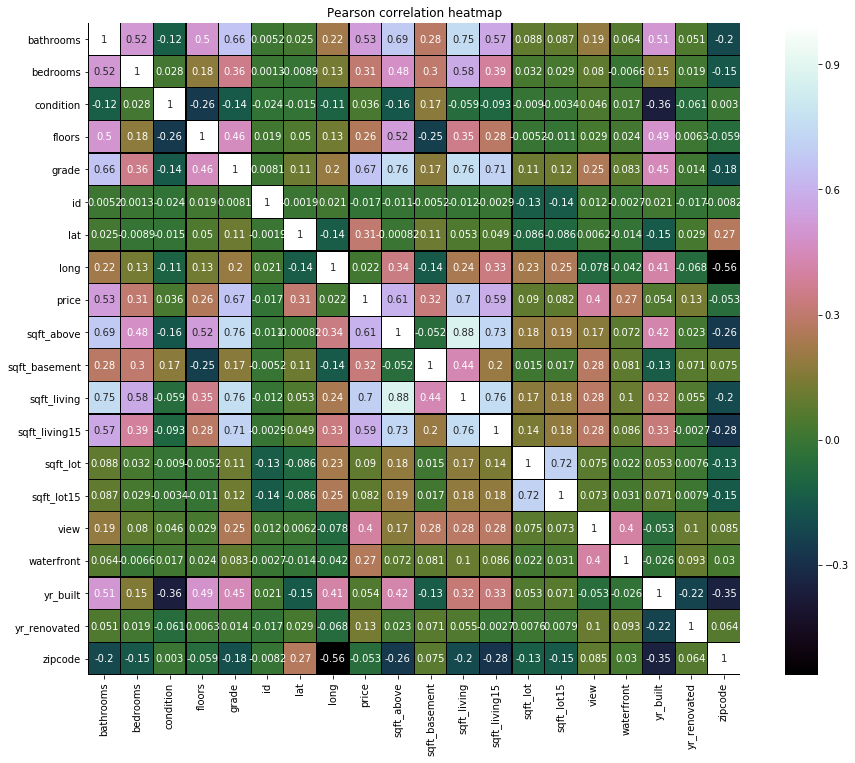

In [30]:
#person correlation heatmap
strings = []
for colname, colvalue in temp_data.iteritems():
    if type(colvalue[1])==str:
        strings.append(colname)

num = temp_data.columns.difference(strings)

house_num = temp_data[num]
f,ax = plt.subplots(figsize=(16,12))
plt.title("Pearson correlation heatmap")

sns.heatmap(house_num.astype(float).corr(),linewidth=0.25,vmax=1.0,square=True,cmap='cubehelix',linecolor='k',annot=True)

5 features with strongest connections are: 'sqft_above','sqft_living','sqft_living15','price','bathrooms'
For the sake of experiment we'll run simple logistic regression model with a single feature as an input data

In [69]:
def simple_logistic_regression_model(train_X,train_Y,test_X,test_Y,feature):
    
    X_train,Y_train = train_X[feature].values.reshape(-1,1), train_Y.values
    X_test,Y_test = test_X[feature].values.reshape(-1,1), np.array(test_Y,dtype=pd.Series)
    
    clf = linear_model.LogisticRegression(random_state=0,solver = 'liblinear',multi_class='ovr').fit(X_train,Y_train)
    pred = clf.predict(X_test)
    
    mse = np.sqrt(metrics.mean_squared_error(Y_test,pred))
    #test_score = clf.score(X_test,Y_test)
    train_score = clf.score(X_train,Y_train)
  
    results_logistic.loc[feature] = (mse,train_score)
    

In [52]:
def multiple_logistic_regression_model(train_X,train_Y,test_X,test_Y,features):
    
    X_train,Y_train =train_X[features].values , train_Y.values
    X_test,Y_test = test_X[features].values ,test_Y.values
    
    clf = linear_model.LogisticRegression(random_state=0, solver = 'lbfgs',multi_class='multinomial').fit(X_train,Y_train)
    
    pred = clf.predict(X_test)
    score = clf.score(X_test,Y_test)
    return score

In [72]:
used_data = data.drop(['id','date','grade'],axis = 1)
results_logistic = pd.DataFrame(columns = ['mse','train_score'])
features = used_data.columns.values
for feature in features:
    simple_logistic_regression_model(train_X,train_Y,test_X,test_Y,feature)
results_logistic.sort_values(['train_score','mse'],ascending=[0,0])

,mse,train_score
sqft_living15,0.980023,0.487623
sqft_above,0.951884,0.484500
floors,1.055481,0.478427
sqft_living,0.977778,0.468826
yr_built,1.161392,0.462927
bathrooms,1.159399,0.436553
view,1.290367,0.427993
waterfront,1.351655,0.417756
sqft_basement,1.358654,0.416888
price,1.359845,0.416831


In [19]:
used_data = data.drop(['id','date','grade'],axis = 1)
features = used_data.columns.values

In [26]:
logistic_regression(train_X,train_Y,test_X,test_Y,features)

0.49849641452694887